# Big Mart Sales Prediction

This project aims to predict sales for Big Mart outlets using machine learning models.

The process includes the following key steps:

1. Data Collection: The dataset is imported, containing information on various items and sales.

2. Data Analysis & Visualization:

 * Initial exploration is conducted to understand the dataset, including checking for missing values and summary statistics.
 * Visualizations such as histograms and count plots are created for both numerical and categorical columns to identify distribution patterns.
3. Data Preprocessing:

 * Checked for and handled missing values.
 * Encoded categorical features using LabelEncoder
 * Split the data into features and target.

4. Model Selection:

 * Evaluated multiple models (Lasso, RandomForestRegressor, KNeighborsRegressor, and XGBRegressor) using cross-validation and selected the best-performing model based on the mean cross-validation score.

5. Model Training :

 * Data is split into training and test sets.
 * The RandomForestRegressor model is trained on the training data.

6. Model Evaluation:
 * Evaluation is performed using R² score and Mean Absolute Error (MAE) on both training and test sets.
 * Visualizations of actual vs. predicted sales are created to compare model predictions.

Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

### 1. Data Collection

In [ ]:
big_mart_data = pd.read_csv('/content/Train.csv')

In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### 2. Data Analysis and Visualization

In [ ]:
#number of rows and columns
big_mart_data.shape

(8523, 12)

In [ ]:
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB




1. Numerical columns

  *   Item_Weight
  *   Item_Visibility
  *   Item_MRP
  *   Outlet_Establishment_Year
  *   Item_Outlet_Sales (Target)

2. Categorical colmuns

  * Item_Identifier
  * Item_Fat_Content
  * Item_Type
  * Outlet_Identifier
  * Outlet_Size
  * Outlet_Location_Type
  * Outlet_Type





In [ ]:
# checking for missing values
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
# statistical mesures of the dataframe
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
sns.set()

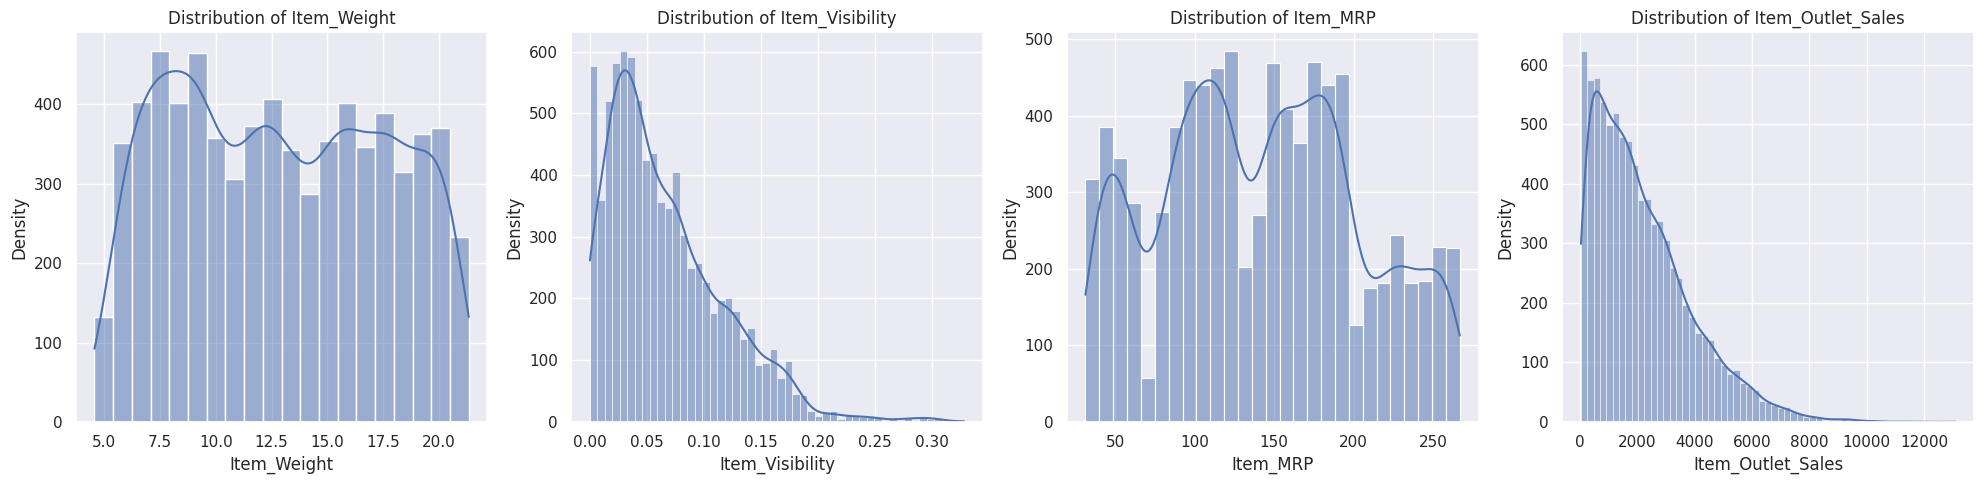

In [ ]:
# Numerical columns distribution
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Create a figure with subplots
fig, axes = plt.subplots(1, len(numerical_columns), figsize=(20, 5))

if len(numerical_columns) == 1:
    axes = [axes]

# Loop over the numerical columns and the corresponding axes
for i, column in enumerate(numerical_columns):
    sns.histplot(big_mart_data[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()


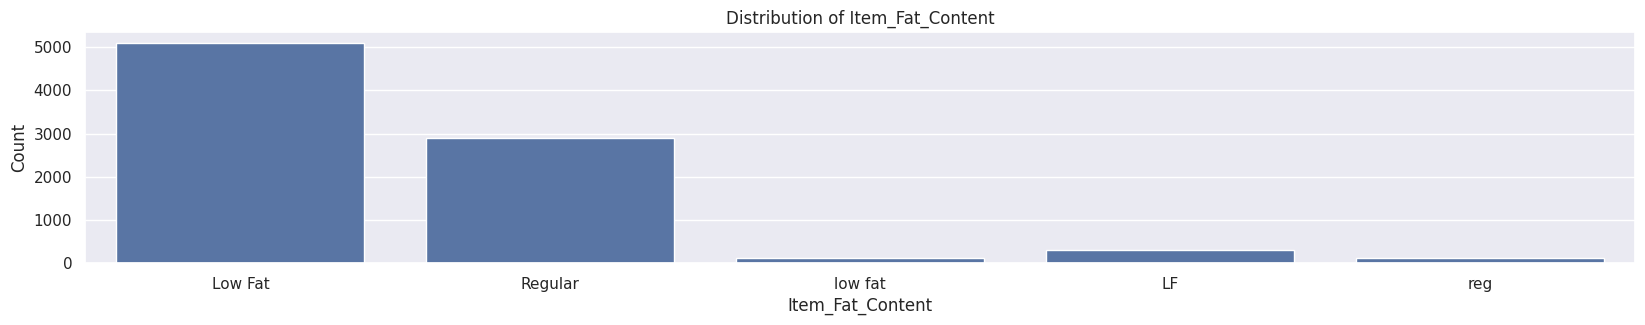

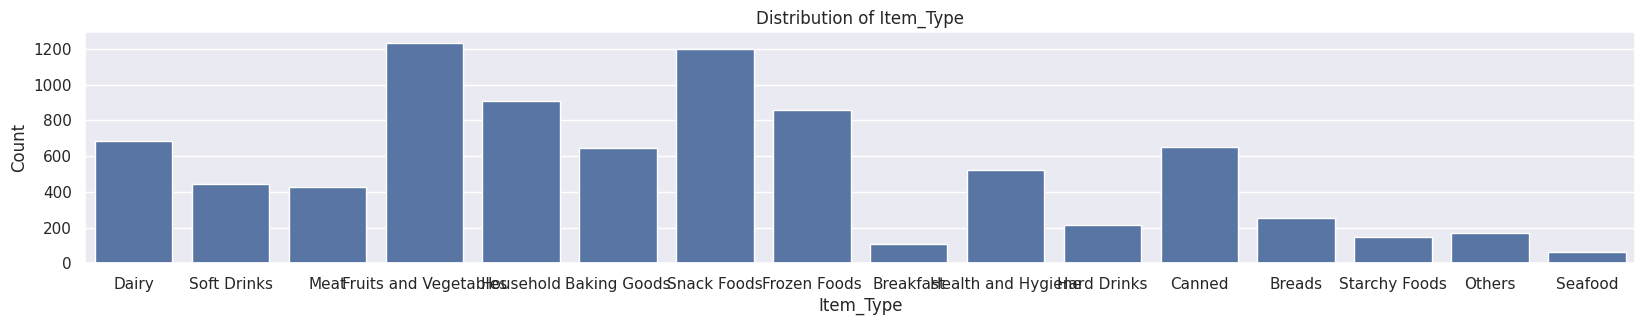

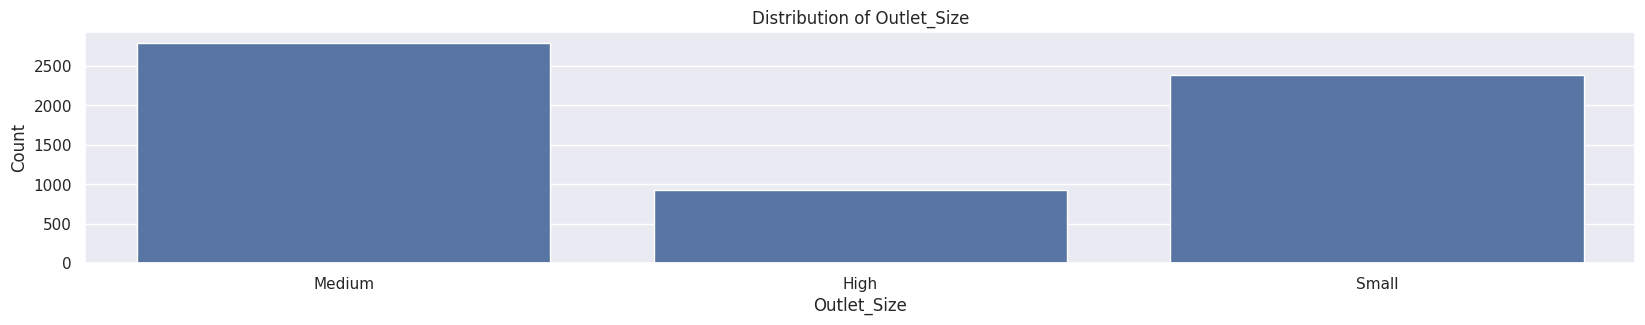

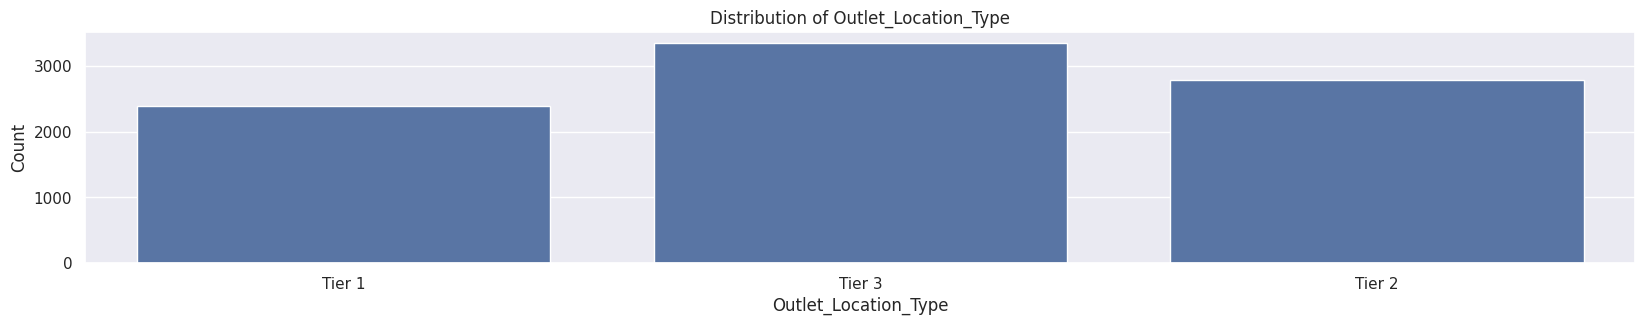

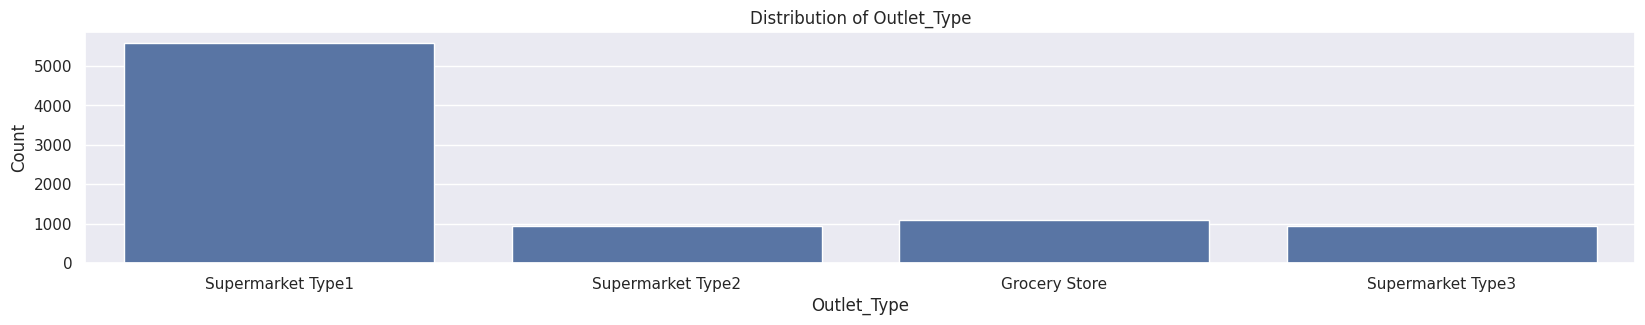

In [ ]:
#categorical column distribution
categorical_columns = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']

for column in categorical_columns:
  plt.figure(figsize=(20,3))
  sns.countplot(x=column, data=big_mart_data)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Count')

plt.show()

### 3. Data Preprocessing



*   Handling missing values



In [ ]:
# checking for missing values
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
Item_weight_mean = big_mart_data['Item_Weight'].mean()

In [ ]:
# filling the missing values in "Item_weight column" with "Mean" value
big_mart_data['Item_Weight'].fillna(Item_weight_mean,inplace=True)

In [ ]:
# checking for missing values
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
mode_of_outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x : x.mode()[0]))

In [ ]:
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
missing_values = big_mart_data['Outlet_Size'].isnull()

In [ ]:
missing_values

,Outlet_Size
0,False
1,False
2,False
3,True
4,False
...,...
8518,False
8519,True
8520,False
8521,False


In [ ]:
#  filling the missing values in "Outlet_Size" column with Mode
big_mart_data.loc[missing_values , 'Outlet_Size'] = big_mart_data.loc[missing_values , 'Outlet_Type'].apply(lambda x : mode_of_outlet_size[x])

In [ ]:
# checking for missing values
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


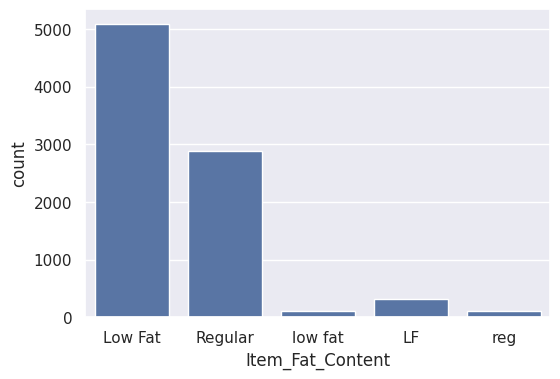

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'Item_Fat_Content', data=big_mart_data)
plt.show()

In [ ]:
#fixing the problem in 'Item_Fat_Content'
big_mart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

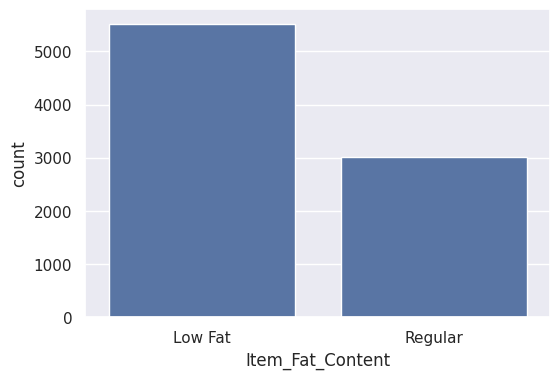

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'Item_Fat_Content', data=big_mart_data)
plt.show()


*   Label Encoding



In [ ]:
encoder = LabelEncoder()

In [ ]:
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
columns_need_encoding = ['Item_Fat_Content' , 'Item_Type','Outlet_Identifier', 'Outlet_Size' , 'Outlet_Location_Type' , 'Outlet_Type']

In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
tracker = {}
for column in columns_need_encoding :
  big_mart_data[column] = encoder.fit_transform(big_mart_data[column])
  tracker[column] = dict(zip(encoder.classes_, encoder.fit_transform(big_mart_data[column])))

In [ ]:
print(tracker)

{'Item_Fat_Content': {'Low Fat': 0, 'Regular': 1}, 'Item_Type': {'Baking Goods': 4, 'Breads': 14, 'Breakfast': 10, 'Canned': 6, 'Dairy': 9, 'Frozen Foods': 0, 'Fruits and Vegetables': 13, 'Hard Drinks': 13, 'Health and Hygiene': 5, 'Household': 5, 'Meat': 6, 'Others': 4, 'Seafood': 6, 'Snack Foods': 13, 'Soft Drinks': 6, 'Starchy Foods': 2}, 'Outlet_Identifier': {'OUT010': 9, 'OUT013': 3, 'OUT017': 9, 'OUT018': 0, 'OUT019': 1, 'OUT027': 3, 'OUT035': 1, 'OUT045': 5, 'OUT046': 7, 'OUT049': 2}, 'Outlet_Size': {'High': 1, 'Medium': 1, 'Small': 1}, 'Outlet_Location_Type': {'Tier 1': 0, 'Tier 2': 2, 'Tier 3': 0}, 'Outlet_Type': {'Grocery Store': 1, 'Supermarket Type1': 2, 'Supermarket Type2': 1, 'Supermarket Type3': 0}}


In [ ]:
for column,values in tracker.items():
  print(f'{column}:{values}')

Item_Fat_Content:{'Low Fat': 0, 'Regular': 1}
Item_Type:{'Baking Goods': 4, 'Breads': 14, 'Breakfast': 10, 'Canned': 6, 'Dairy': 9, 'Frozen Foods': 0, 'Fruits and Vegetables': 13, 'Hard Drinks': 13, 'Health and Hygiene': 5, 'Household': 5, 'Meat': 6, 'Others': 4, 'Seafood': 6, 'Snack Foods': 13, 'Soft Drinks': 6, 'Starchy Foods': 2}
Outlet_Identifier:{'OUT010': 9, 'OUT013': 3, 'OUT017': 9, 'OUT018': 0, 'OUT019': 1, 'OUT027': 3, 'OUT035': 1, 'OUT045': 5, 'OUT046': 7, 'OUT049': 2}
Outlet_Size:{'High': 1, 'Medium': 1, 'Small': 1}
Outlet_Location_Type:{'Tier 1': 0, 'Tier 2': 2, 'Tier 3': 0}
Outlet_Type:{'Grocery Store': 1, 'Supermarket Type1': 2, 'Supermarket Type2': 1, 'Supermarket Type3': 0}


In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


*  Splitting features and Target

In [ ]:
X = big_mart_data.drop(columns=['Item_Identifier','Item_Outlet_Sales'],axis=1)
Y = big_mart_data['Item_Outlet_Sales']

### 4. Model Selection

In [ ]:
models = [Lasso(),RandomForestRegressor(),KNeighborsRegressor(),XGBRegressor()]

In [ ]:
for model in models:
  cv_score = cross_val_score(model,X,Y,cv=4,scoring='r2')
  print('model :',model)
  print('model_scores :',cv_score)
  print('mean score :',cv_score.mean())
  print('-----------------------------------------------')

model : Lasso()
model_scores : [0.51657519 0.48029257 0.5120272  0.49400496]
mean score : 0.500724979052058
-----------------------------------------------
model : RandomForestRegressor()
model_scores : [0.55969087 0.51576778 0.57134272 0.55107414]
mean score : 0.5494688785770241
-----------------------------------------------
model : KNeighborsRegressor()
model_scores : [0.5043368  0.44591032 0.4771411  0.5146036 ]
mean score : 0.48549795189044115
-----------------------------------------------
model : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             m

**Inference**

* Best Performing Model: The Random Forest Regressor has the highest mean cross-validation score, indicating it is the best-performing model among the ones tested.
* Model Selection: Based on these scores, the Random Forest Regressor would be the preferred model for this particular task, followed closely by the XGBoost Regressor.

### 5. Model Training

In [ ]:
#splitting data into training data and test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 10) (6818, 10) (1705, 10)


In [ ]:
model = RandomForestRegressor()

In [ ]:
model.fit(X_train,Y_train)

RandomForestRegressor()

### 6. Model Evaluation

In [ ]:
#Evaluation on training data
train_data_prediction = model.predict(X_train)

print('R2 score :',r2_score(Y_train,train_data_prediction))
print('MAE :',mean_absolute_error(Y_train,train_data_prediction))

R2 score : 0.9385456186914869
MAE : 290.84919208301557


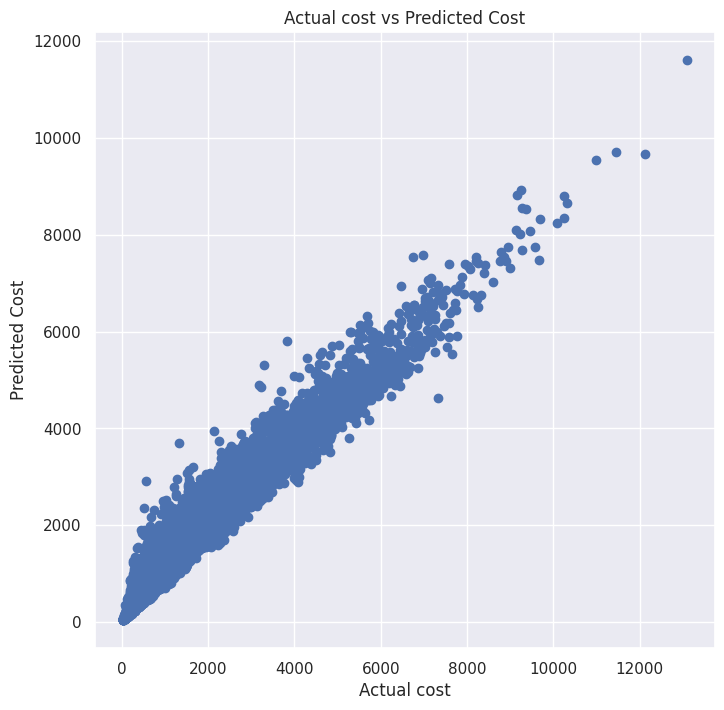

In [ ]:
# Visualizing and comparing the actual cost and predicted cost
plt.figure(figsize=(8,8))
plt.scatter(Y_train,train_data_prediction)
plt.title('Actual cost vs Predicted Cost')
plt.xlabel('Actual cost')
plt.ylabel('Predicted Cost')
plt.show()

In [ ]:
#Evaluation on test data
test_data_prediction = model.predict(X_test)

print('R2 score :',r2_score(Y_test,test_data_prediction))
print('MAE :',mean_absolute_error(Y_test,test_data_prediction))

R2 score : 0.5423608649439657
MAE : 832.0509824222875


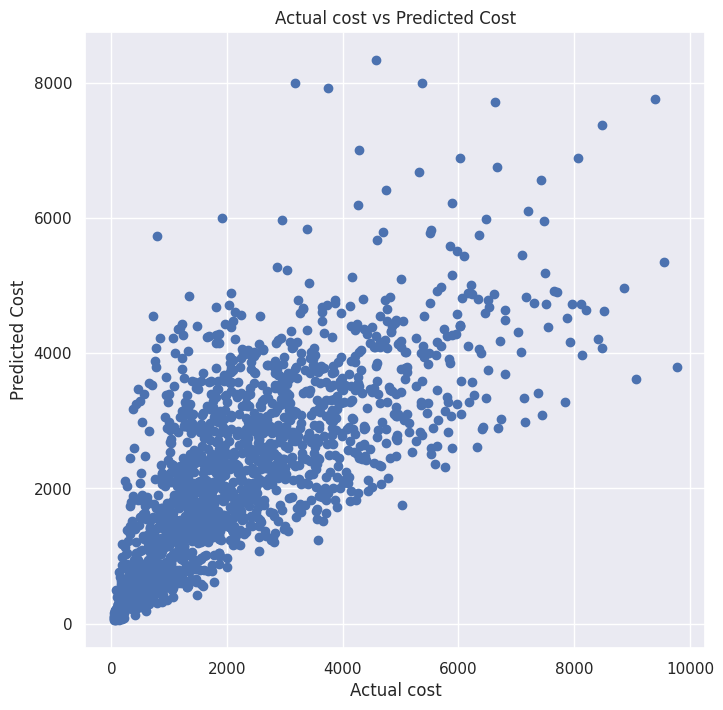

In [ ]:
# Visualizing and comparing the actual cost and predicted cost
plt.figure(figsize=(8,8))
plt.scatter(Y_test,test_data_prediction)
plt.title('Actual cost vs Predicted Cost')
plt.xlabel('Actual cost')
plt.ylabel('Predicted Cost')
plt.show()